In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model #scikit-learn
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = 'https://raw.githubusercontent.com/statsmodels/statsmodels/main/statsmodels/datasets/stackloss/stackloss.csv'
df = pd.read_csv(url)
df.head()

,STACKLOSS,AIRFLOW,WATERTEMP,ACIDCONC
0,42,80,27,89
1,37,80,27,88
2,37,75,25,90
3,28,62,24,87
4,18,62,22,87


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   STACKLOSS  21 non-null     int64
 1   AIRFLOW    21 non-null     int64
 2   WATERTEMP  21 non-null     int64
 3   ACIDCONC   21 non-null     int64
dtypes: int64(4)
memory usage: 804.0 bytes


In [4]:
df.describe()

,STACKLOSS,AIRFLOW,WATERTEMP,ACIDCONC
count,21.000000,21.000000,21.000000,21.000000
mean,17.523810,60.428571,21.095238,86.285714
std,10.171623,9.168268,3.160771,5.358571
min,7.000000,50.000000,17.000000,72.000000
25%,11.000000,56.000000,18.000000,82.000000
50%,15.000000,58.000000,20.000000,87.000000
75%,19.000000,62.000000,24.000000,89.000000
max,42.000000,80.000000,27.000000,93.000000


In [5]:
# Muutetaan kokonaisluvut liukuluvuiksi myöhempää analyysiä varten.
df = df.astype(dtype='float64')
df

,STACKLOSS,AIRFLOW,WATERTEMP,ACIDCONC
0,42.0,80.0,27.0,89.0
1,37.0,80.0,27.0,88.0
2,37.0,75.0,25.0,90.0
3,28.0,62.0,24.0,87.0
4,18.0,62.0,22.0,87.0
5,18.0,62.0,23.0,87.0
6,19.0,62.0,24.0,93.0
7,20.0,62.0,24.0,93.0
8,15.0,58.0,23.0,87.0
9,14.0,58.0,18.0,80.0


array([[<Axes: title={'center': 'STACKLOSS'}>,
        <Axes: title={'center': 'AIRFLOW'}>],
       [<Axes: title={'center': 'WATERTEMP'}>,
        <Axes: title={'center': 'ACIDCONC'}>]], dtype=object)

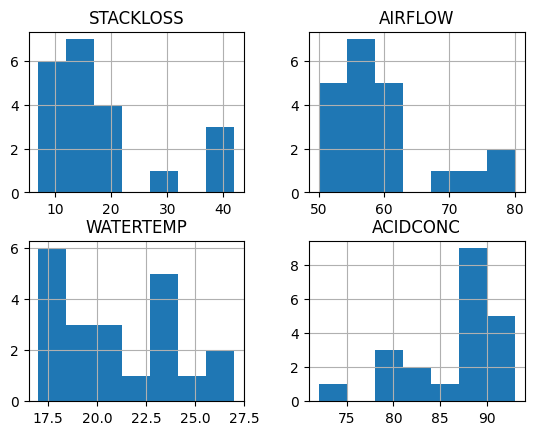

In [6]:
df.hist(bins=7)

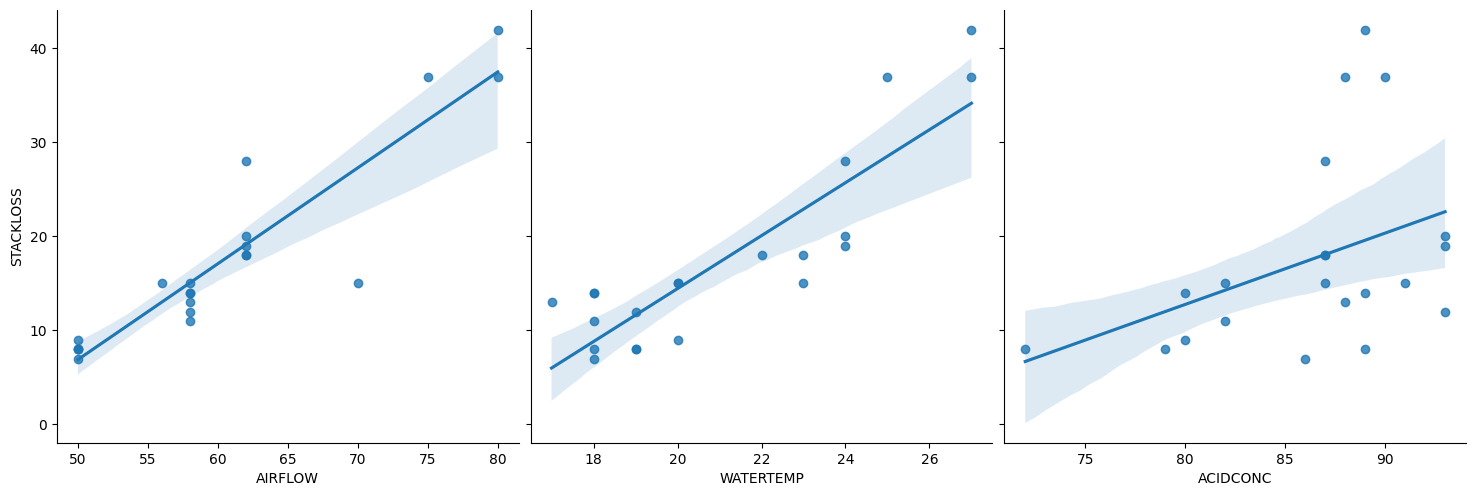

In [7]:
sns.pairplot(df,
             x_vars = ['AIRFLOW', 'WATERTEMP', 'ACIDCONC'],
             y_vars = 'STACKLOSS',
             height = 5,
             kind = 'reg')
plt.show()

In [8]:
kor = df.corr( )
print(kor)

           STACKLOSS   AIRFLOW  WATERTEMP  ACIDCONC
STACKLOSS   1.000000  0.919663   0.875504  0.399830
AIRFLOW     0.919663  1.000000   0.781852  0.500143
WATERTEMP   0.875504  0.781852   1.000000  0.390940
ACIDCONC    0.399830  0.500143   0.390940  1.000000


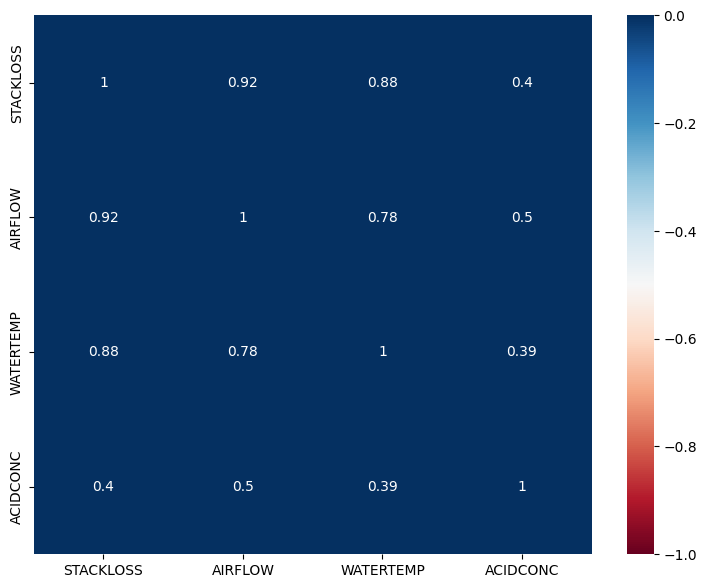

In [9]:
plt.figure(figsize=(9,7))
sns.heatmap(kor, vmin=-1, vmax=0, cmap='RdBu', annot=True)
plt.show()

In [10]:
# valmistellaan datan mallinnusta varten

X =df.iloc[:,1:4] # rivit , sarakkeet
Y= df.iloc[:, 0]
print(X)
print(Y)

    AIRFLOW  WATERTEMP  ACIDCONC
0      80.0       27.0      89.0
1      80.0       27.0      88.0
2      75.0       25.0      90.0
3      62.0       24.0      87.0
4      62.0       22.0      87.0
5      62.0       23.0      87.0
6      62.0       24.0      93.0
7      62.0       24.0      93.0
8      58.0       23.0      87.0
9      58.0       18.0      80.0
10     58.0       18.0      89.0
11     58.0       17.0      88.0
12     58.0       18.0      82.0
13     58.0       19.0      93.0
14     50.0       18.0      89.0
15     50.0       18.0      86.0
16     50.0       19.0      72.0
17     50.0       19.0      79.0
18     50.0       20.0      80.0
19     56.0       20.0      82.0
20     70.0       20.0      91.0
0     42.0
1     37.0
2     37.0
3     28.0
4     18.0
5     18.0
6     19.0
7     20.0
8     15.0
9     14.0
10    14.0
11    13.0
12    11.0
13    12.0
14     8.0
15     7.0
16     8.0
17     8.0
18     9.0
19    15.0
20    15.0
Name: STACKLOSS, dtype: float64


In [11]:
# mallinnus
reg = linear_model.LinearRegression()

#sovitetaan arvot malliin
reg.fit(X, Y)

print("coefficients / kolmen eri kulmakertoimet", reg.coef_)
print("intercepts / vakiotermi", reg.intercept_)

coefficients / kolmen eri kulmakertoimet [ 0.7156402   1.29528612 -0.15212252]
intercepts / vakiotermi -39.919674420124046


In [12]:
# testataan mallin luotettavuutta
# niin vähän rivejä ettei kannata jakaa osiin, HUONO KÄYTÄNTÖ
# ennusteet tehtäisiin testijoukosta

y_pred = reg.predict(X)
y_pred 



array([38.76536277, 38.91748529, 32.444467  , 22.30222583, 19.71165358,
       21.0069397 , 21.38949071, 21.38949071, 18.1443789 , 12.73280592,
       11.36370324, 10.22053964, 12.42856088, 12.05049929,  5.63858164,
        6.0949492 ,  9.51995059,  8.45509295,  9.59825656, 13.58785272,
       22.23771286])

In [13]:
# testataan mallin hyvyyttä käyttäen RMSE ja R2

rmse = root_mean_squared_error(Y, y_pred) # vastemuuttuja ja ennustettu vastemuuttuja
r2_score = r2_score(Y, y_pred) # y todelliset arvot ja ennustetut arvot

print("RMSE: ", rmse) # mikä on hyväksyttävä virhe?
print("R2: ", r2_score) # yksinään ei kerro mitään, vertaillaan malleja toisiinsa 




RMSE:  2.9181693674399196
R2:  0.9135769044606818


In [14]:
df2 = pd.concat([Y, pd.Series(y_pred), pd.Series(Y-y_pred)], axis=1)
df2.columns = ['Y observed', 'Y predicted', 'residual']
df2


,Y observed,Y predicted,residual
0,42.0,38.765363,3.234637
1,37.0,38.917485,-1.917485
2,37.0,32.444467,4.555533
3,28.0,22.302226,5.697774
4,18.0,19.711654,-1.711654
5,18.0,21.006940,-3.006940
6,19.0,21.389491,-2.389491
7,20.0,21.389491,-1.389491
8,15.0,18.144379,-3.144379
9,14.0,12.732806,1.267194


<Figure size 640x480 with 0 Axes>

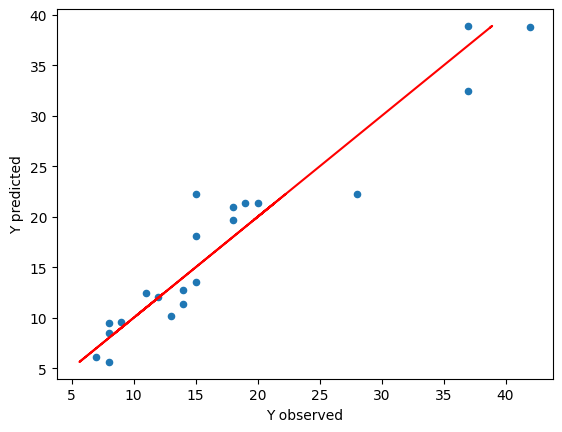

In [15]:
plt.figure()
df2.plot.scatter(x='Y observed', y='Y predicted')
plt.plot(y_pred, y_pred, color = 'red')
plt.show()

<Figure size 640x480 with 0 Axes>

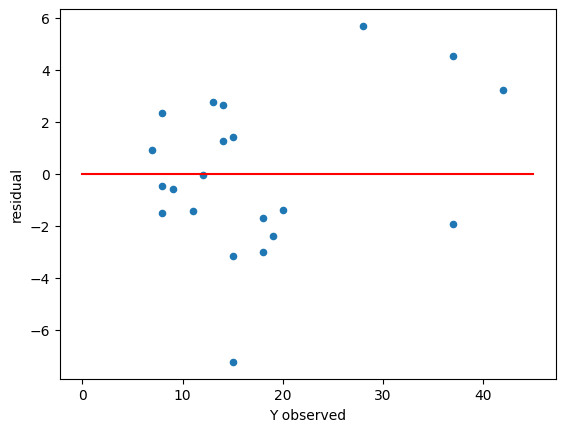

In [16]:
plt.figure()
df2.plot.scatter(x='Y observed', y='residual')
plt.plot([0,45], [0,0], color = 'red')
plt.show()

In [17]:
# standardisointi
scaler = StandardScaler()
dfscaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
dfscaled.head()

,STACKLOSS,AIRFLOW,WATERTEMP,ACIDCONC
0,2.465745,2.187408,1.914273,0.519040
1,1.962043,2.187408,1.914273,0.327815
2,1.962043,1.628581,1.265890,0.710266
3,1.055377,0.175631,0.941699,0.136590
4,0.047972,0.175631,0.293316,0.136590


In [18]:
# mallinnus uudestaan

Xscaled = dfscaled.iloc[:, 1:4]
Yscaled = dfscaled.iloc[:, 0]

In [19]:
reg2 = linear_model.LinearRegression()
# sovitetaan
reg2.fit(Xscaled, Yscaled)
print("coefficient / kulmakerroin", reg2.coef_)
print("intercept / vakiotermi", reg2.intercept_)

# suurin merkitys on ilman virtausnopeudella AIRFLOW

coefficient / kulmakerroin [ 0.64504766  0.40250249 -0.08014054]
intercept / vakiotermi -1.5639539059744083e-16
